In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_parquet(r'C:\Users\91706\Data Analytics Practice\databases\python\crime data\Crime_Data_from_2020_to_Present.parquet')

- Age Distribution of Victims

In [3]:
bins=[0,12,18,30,45,60,float('inf')]
labels=['0-12','13-18','19-30','31-45','46-60','>60']
df['age_bin']=pd.cut(df['Vict Age'],bins=bins,labels=labels,right=False, include_lowest=True)

In [4]:
plot10=df.groupby('age_bin',observed=True).size().reset_index(name='count')
plot10

,age_bin,count
0,0-12,275740
1,13-18,19080
2,19-30,195843
3,31-45,266481
4,46-60,156826
5,>60,90884


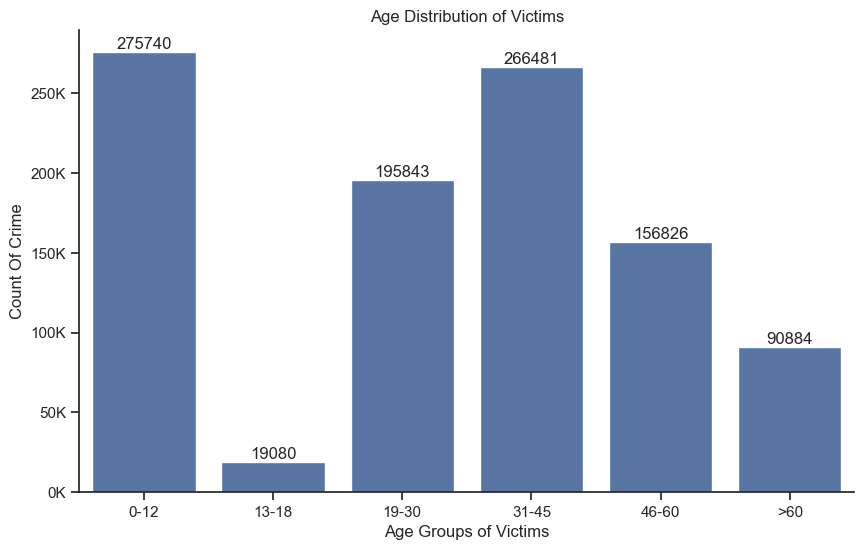

In [5]:
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')

ax=sns.barplot(data=plot10,y='count',x='age_bin')
plt.xlabel('Age Groups of Victims')
plt.ylabel('Count Of Crime')
plt.title('Age Distribution of Victims')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
for i in ax.containers:
    ax.bar_label(i)

sns.despine()
plt.show()

- Gender Breakdown

In [6]:
plot11=df.groupby('Vict Sex').size().sort_values(ascending=False).reset_index(name='count')
plot11

,Vict Sex,count
0,Male,403879
1,Female,358580
2,Unknown,242418
3,Transgender/Other,114


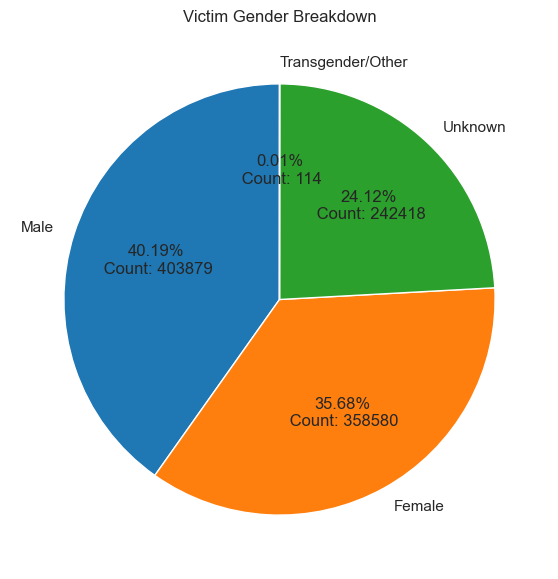

In [7]:
plt.figure(figsize=(7,7))

plt.pie(plot11['count'],
        labels=plot11['Vict Sex'],
        autopct=lambda p: f'{p:.2f}%\n Count: {p*sum(plot11['count'])/100:.0f}',
        startangle=90,
        wedgeprops={'edgecolor': 'white'},
        colors=plt.cm.tab10.colors)

plt.title('Victim Gender Breakdown')
plt.show()

- Descent Distribution

In [8]:
plot12=df.groupby('Vict Descent').size().sort_values(ascending=False).reset_index(name='count')
plot12

,Vict Descent,count
0,Hispanic/Latin/Mexican,296404
1,Unknown,251341
2,White,201442
3,Black,135816
4,Other,78005
5,Other Asian,21340
6,Korean,5990
7,Filipino,4838
8,Chinese,4631
9,Japanese,1586


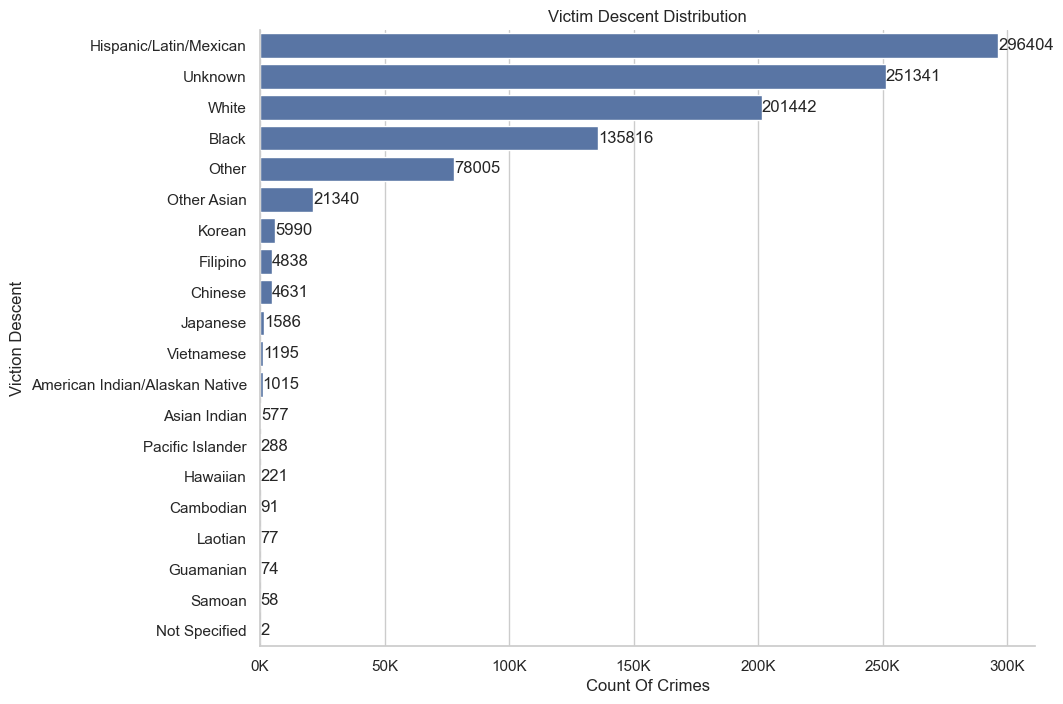

In [9]:
plt.figure(figsize=(10,8))
sns.set_theme(style='whitegrid')

ax=sns.barplot(data=plot12,x='count',y='Vict Descent')
plt.xlabel('Count Of Crimes')
plt.ylabel('Viction Descent')
plt.title('Victim Descent Distribution')

for i in ax.containers:
    ax.bar_label(i)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
sns.despine()
plt.show()

- Most Common Crime Types by Victim Gender

In [10]:
plot13=df[df['Vict Sex'] == 'Female']['Crm Cd Desc'].value_counts().head()
plot13a=df[df['Vict Sex'] == 'Male']['Crm Cd Desc'].value_counts().head()
plot13b=df[df['Vict Sex'] == 'Unknown']['Crm Cd Desc'].value_counts().head()
plot13c=df[df['Vict Sex'] == 'Transgender/Other']['Crm Cd Desc'].value_counts().head()

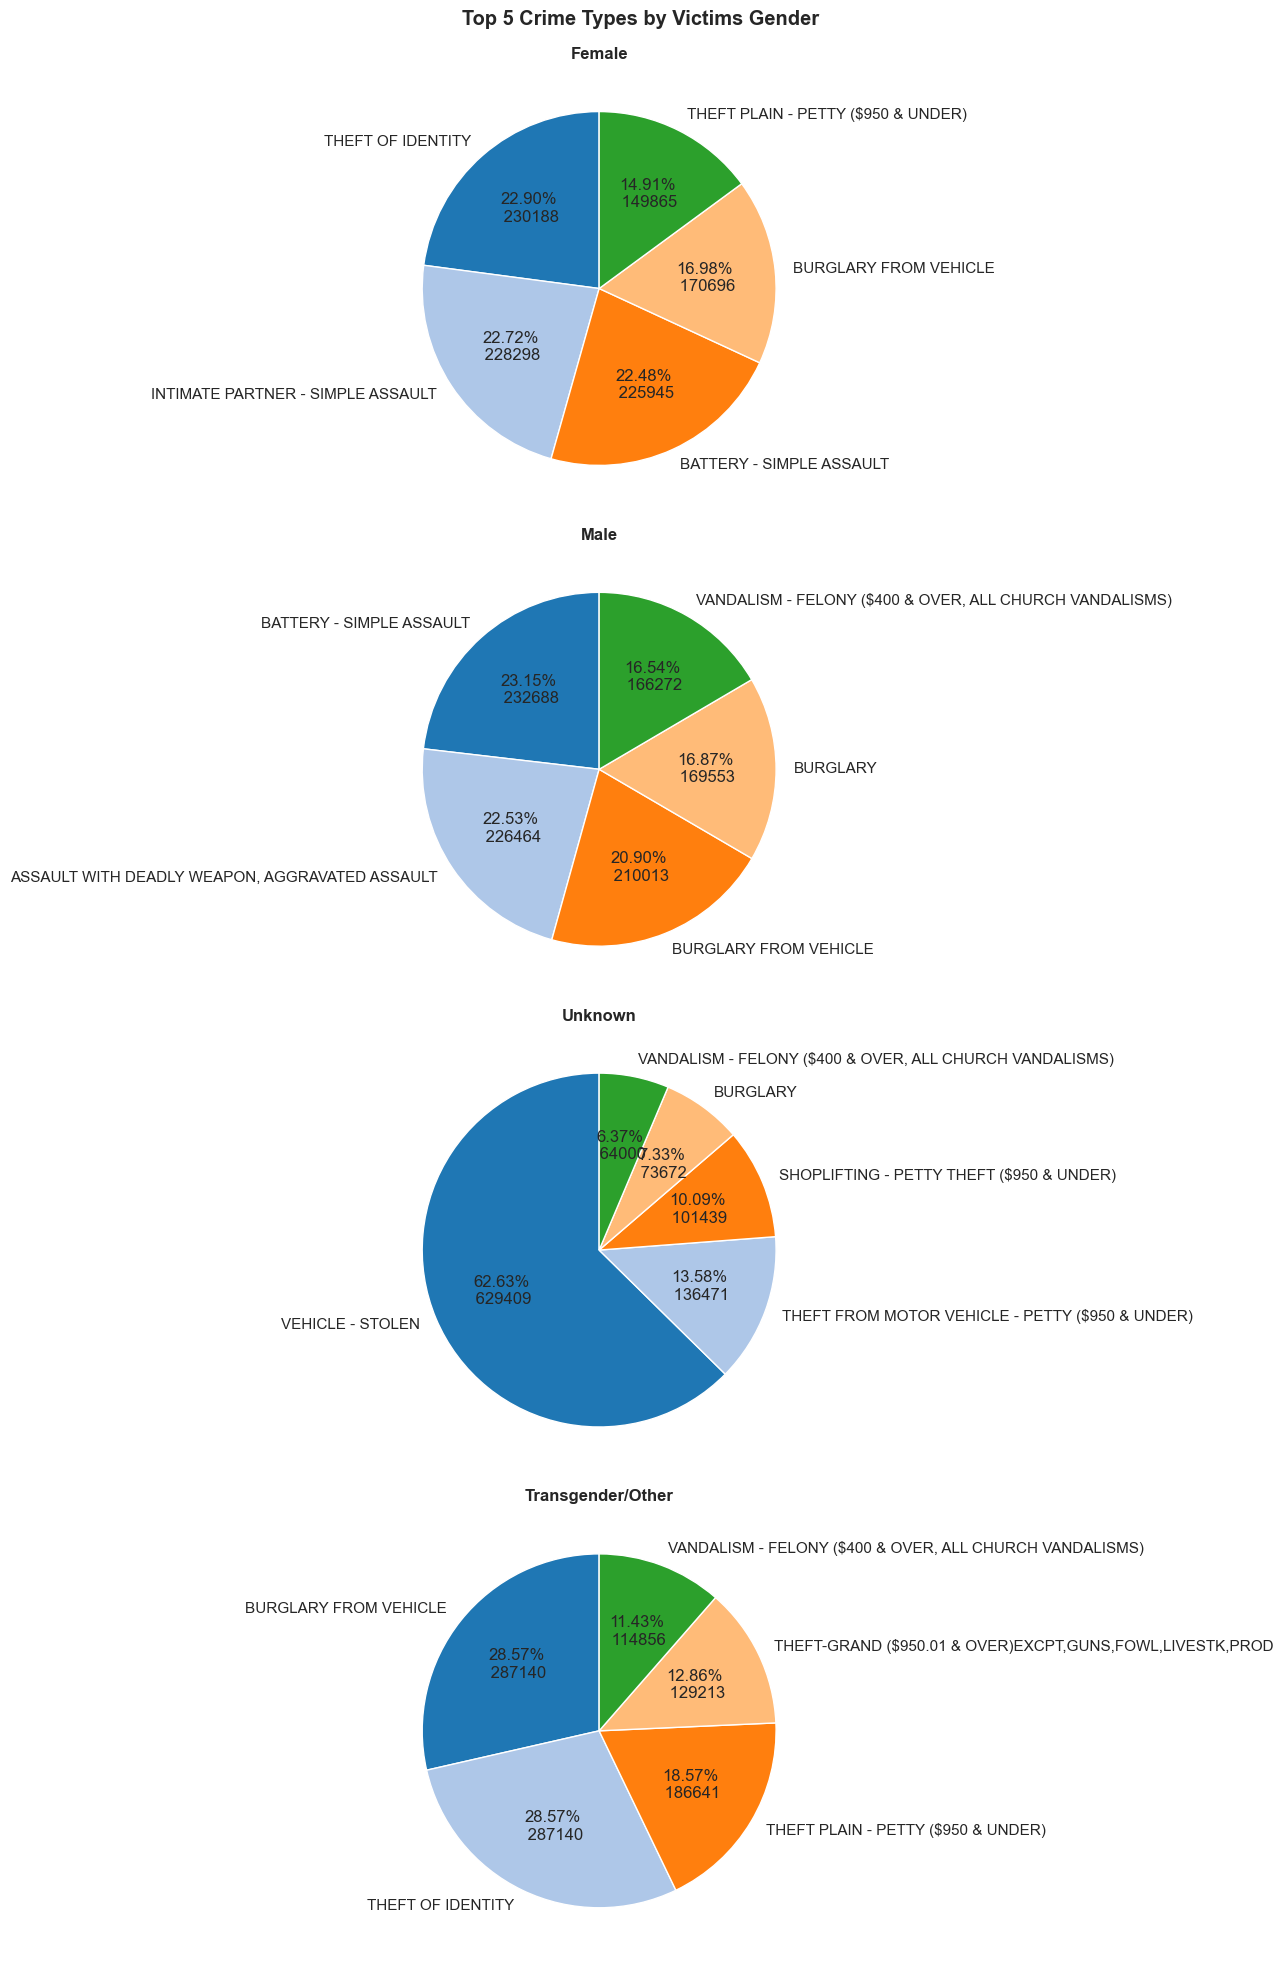

In [11]:
series_list = [
    ('Female', plot13),
    ('Male', plot13a),
    ('Unknown', plot13b),
    ('Transgender/Other', plot13c)
]

fig, ax = plt.subplots(4, 1, figsize=(10, 20))
colors = plt.cm.tab20.colors 

for i, (title, data) in enumerate(series_list):
    ax[i].pie(
        data,
        labels=data.index,
        autopct=lambda p: f'{p:.2f}%\n {p*sum(plot11['count'])/100:.0f}',
        startangle=90,
        colors=colors
    )
    ax[i].set_title(title, fontsize=12, weight='bold')


plt.suptitle('Top 5 Crime Types by Victims Gender\n', weight='bold')

plt.tight_layout()
plt.show()

- Age Group vs Crime Type Heatmap

In [12]:
plot14=df.groupby('age_bin',observed=True)['Crm Cd Desc'].value_counts().groupby(level=0).head(7).reset_index(name='count')
plot14

C:\Users\91706\AppData\Local\Temp\ipykernel_16048\3645351132.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot14=df.groupby('age_bin',observed=True)['Crm Cd Desc'].value_counts().groupby(level=0).head(7).reset_index(name='count')


,age_bin,Crm Cd Desc,count
0,0-12,VEHICLE - STOLEN,114843
1,0-12,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),25033
2,0-12,SHOPLIFTING - PETTY THEFT ($950 & UNDER),21512
3,0-12,BURGLARY,18130
4,0-12,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14735
5,0-12,TRESPASSING,9662
6,0-12,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",7470
7,13-18,BATTERY - SIMPLE ASSAULT,3527
8,13-18,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1953
9,13-18,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,1808


C:\Users\91706\AppData\Local\Temp\ipykernel_16048\1744280376.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data=plot14.pivot_table(


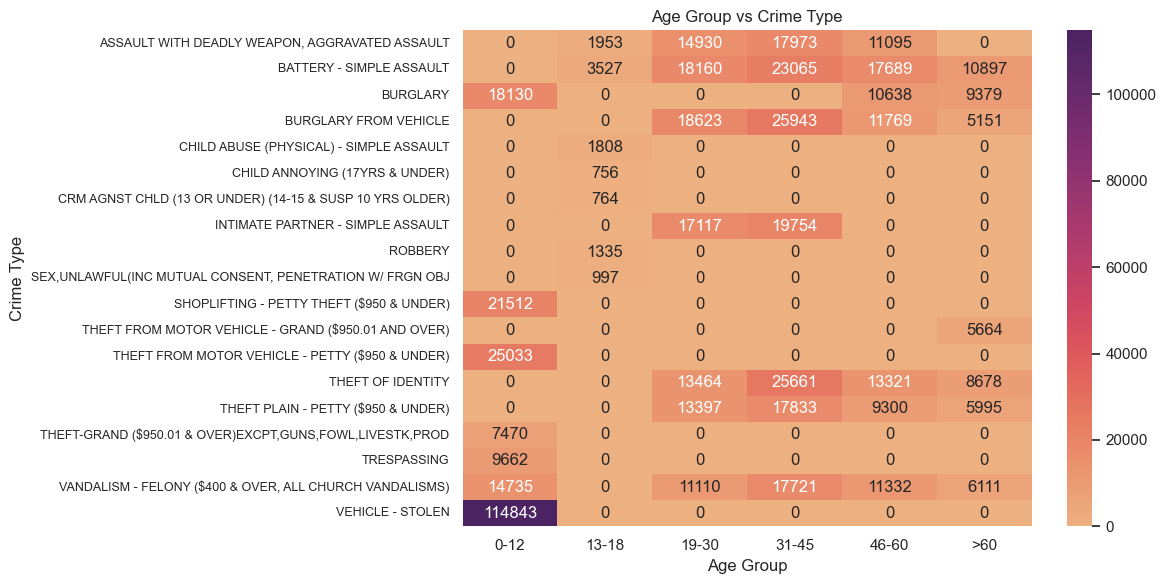

In [13]:
heatmap_data=plot14.pivot_table(
    index='Crm Cd Desc',
    columns='age_bin',
    values='count',
    fill_value=0
)

plt.figure(figsize=(12,6))
ax=sns.heatmap(heatmap_data, cmap='flare', annot=True, fmt='.0f')
plt.title('Age Group vs Crime Type')
plt.xlabel('Age Group')
plt.ylabel('Crime Type')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

- Victim Descent vs Area Comparison

In [40]:
top5 = df['Vict Descent'].value_counts().sort_values(ascending=False).head().index
plot15= (
    df[df['Vict Descent'].isin(top5)]
    .groupby('Vict Descent')['AREA NAME']
    .value_counts()
    .groupby(level=0)
    .head(21)
    .reset_index(name='count')
)
plot15

,Vict Descent,AREA NAME,count
0,Black,77th Street,22993
1,Black,Southwest,16790
2,Black,Southeast,16514
3,Black,Central,13516
4,Black,Newton,7569
...,...,...,...
100,White,Newton,4502
101,White,Mission,4022
102,White,Hollenbeck,3108
103,White,77th Street,1671


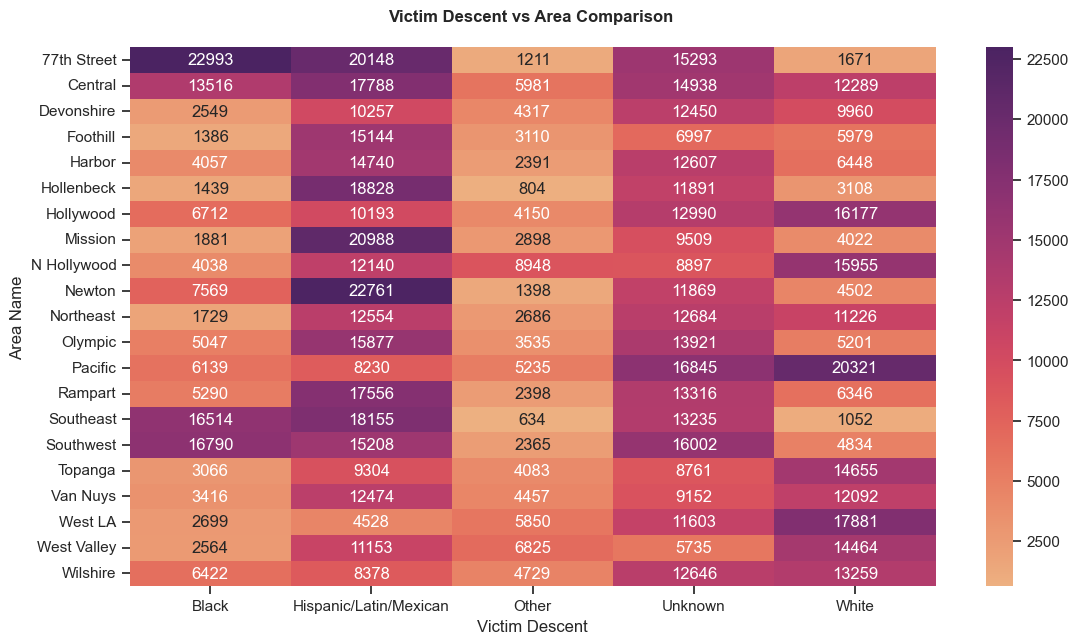

In [43]:
plt.figure(figsize=(13,7))

heatmap_data1=plot15.pivot_table(
    index='AREA NAME',
    columns='Vict Descent',
    values='count',
    fill_value=0
)

ax=sns.heatmap(heatmap_data1, cmap='flare', annot=True, fmt='.0f')
plt.xlabel('Victim Descent')
plt.ylabel('Area Name')
plt.title('Victim Descent vs Area Comparison \n',weight='bold')
plt.show()

- Crime Severity by Weapon Usage

In [16]:
plot16=df.groupby('Weapon Desc',observed=True).size().sort_values(ascending=False).head(10).iloc[1:].reset_index(name='count')
plot16

,Weapon Desc,count
0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",174761
1,UNKNOWN WEAPON/OTHER WEAPON,36390
2,VERBAL THREAT,23846
3,HAND GUN,20182
4,SEMI-AUTOMATIC PISTOL,7267
5,KNIFE WITH BLADE 6INCHES OR LESS,6838
6,UNKNOWN FIREARM,6582
7,OTHER KNIFE,5879
8,MACE/PEPPER SPRAY,3730


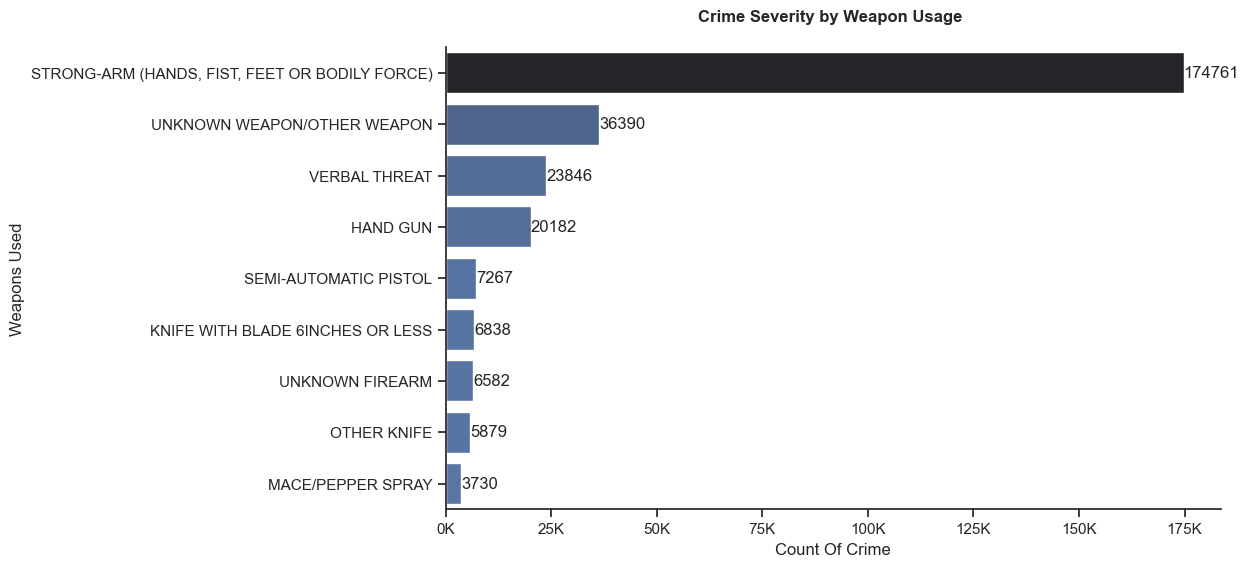

In [17]:
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')

ax=sns.barplot(data=plot16,x='count',y='Weapon Desc',hue='count',palette='dark:b_r')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
plt.xlabel('Count Of Crime')
plt.ylabel('Weapons Used')
plt.title('Crime Severity by Weapon Usage \n', weight='bold')
for i in ax.containers:
    ax.bar_label(i)

ax.legend_.remove()
sns.despine()
plt.show()

- Average Victim Age for Violent vs Non-Violent Crimes

In [18]:
violent_keywords = [
    'ASSAULT', 'BATTERY', 'HOMICIDE', 'MANSLAUGHTER', 
    'RAPE', 'SEXUAL', 'ROBBERY', 'THREAT', 'KIDNAPPING',
    'CHILD ABUSE', 'LEWD', 'BRANDISH', 'ARSON', 
    'INTIMATE PARTNER', 'INCEST'
]

df['Crime Type'] = df['Crm Cd Desc'].apply(
    lambda x: 'Violent' if any(word in str(x).upper() for word in violent_keywords) else 'Non-Violent'
)

In [19]:
plot17=df.groupby('Crime Type')['Vict Age'].mean().round(2).reset_index(name='avg_age')
plot17

,Crime Type,avg_age
0,Non-Violent,26.24
1,Violent,35.31


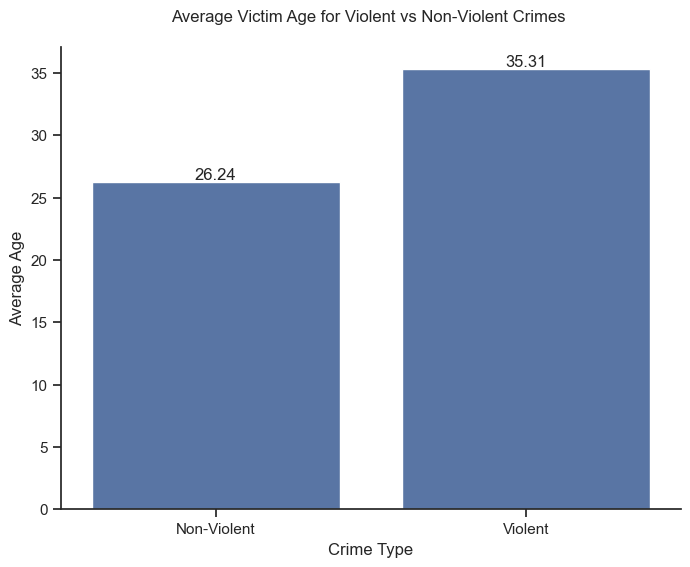

In [20]:
plt.figure(figsize=(8,6))
ax=sns.barplot(data=plot17,x='Crime Type',y='avg_age')
plt.xlabel('Crime Type')
plt.ylabel('Average Age')
plt.title('Average Victim Age for Violent vs Non-Violent Crimes \n')
for i in ax.containers:
    ax.bar_label(i)

sns.despine()
plt.show()